In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

import re

In [2]:
df = pd.read_pickle("./model_name_dataset.pkl")
df.head(10)

,product,dataset,brand,maker,model_name,label
0,s 아람 한일 전기 미니온풍기 hef-600 히터 난방 난로,"(hef-600, True)",한일,한일,hef-600,True
1,삼성 clt-k406s clp-367w 정품토너 s3055,"(clt-k406s, False)",,기타,clt-k406s,False
1,삼성 clt-k406s clp-367w 정품토너 s3055,"(clp-367w, False)",,기타,clp-367w,False
1,삼성 clt-k406s clp-367w 정품토너 s3055,"(s3055, False)",,기타,s3055,False
2,솔리퍼블릭 tracks hd v10 3 버튼 헤드폰,"(v10, False)",,솔리퍼블릭,v10,False
3,필라 cs-2900 ac - 스피커 pc 스피커 2 채널 3.5mm,"(cs-2900, False)",,기타,cs-2900,False
3,필라 cs-2900 ac - 스피커 pc 스피커 2 채널 3.5mm,"(3.5mm, False)",,기타,3.5mm,False
4,호루스벤누 호루스벤누 m-2538t 트레블러 삼각대 블루,"(m-2538t, True)",호루스벤누,호루스벤누,m-2538t,True
5,필립스 ) 차량용핸디형청소기 fc-6141,"(fc-6141, False)",필립스,상품상세정보 참조,fc-6141,False
6,gt 삼성 광마우스 smh-3100ub,"(smh-3100ub, False)",중국,중국,smh-3100ub,False


In [3]:
df.reset_index(inplace=True)
df.rename(columns={"index":"pid"}, inplace=True)
df.head(10)

,pid,product,dataset,brand,maker,model_name,label
0,0,s 아람 한일 전기 미니온풍기 hef-600 히터 난방 난로,"(hef-600, True)",한일,한일,hef-600,True
1,1,삼성 clt-k406s clp-367w 정품토너 s3055,"(clt-k406s, False)",,기타,clt-k406s,False
2,1,삼성 clt-k406s clp-367w 정품토너 s3055,"(clp-367w, False)",,기타,clp-367w,False
3,1,삼성 clt-k406s clp-367w 정품토너 s3055,"(s3055, False)",,기타,s3055,False
4,2,솔리퍼블릭 tracks hd v10 3 버튼 헤드폰,"(v10, False)",,솔리퍼블릭,v10,False
5,3,필라 cs-2900 ac - 스피커 pc 스피커 2 채널 3.5mm,"(cs-2900, False)",,기타,cs-2900,False
6,3,필라 cs-2900 ac - 스피커 pc 스피커 2 채널 3.5mm,"(3.5mm, False)",,기타,3.5mm,False
7,4,호루스벤누 호루스벤누 m-2538t 트레블러 삼각대 블루,"(m-2538t, True)",호루스벤누,호루스벤누,m-2538t,True
8,5,필립스 ) 차량용핸디형청소기 fc-6141,"(fc-6141, False)",필립스,상품상세정보 참조,fc-6141,False
9,6,gt 삼성 광마우스 smh-3100ub,"(smh-3100ub, False)",중국,중국,smh-3100ub,False


## Length of Model Name

In [4]:
# 대상 term -> model name의 전체 길이 ex) hef-600 -> 7
df["term_len"] = df["model_name"].str.len()
df[["model_name", "term_len"]].head()

,model_name,term_len
0,hef-600,7
1,clt-k406s,9
2,clp-367w,8
3,s3055,5
4,v10,3


In [5]:
df["term_len"].max()

75

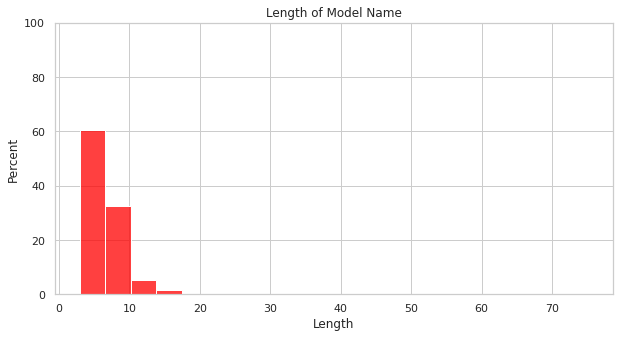

In [6]:
fig = plt.figure(figsize=(10, 5))
sns.set_theme(style='whitegrid')
sns.histplot(data=df["term_len"], color="red", stat="percent", bins=20, element="bars", cumulative=False).set(title="Length of Model Name", xlabel="Length", ylabel="Percent")
plt.ylim(0, 100)
plt.show()

## Length of Unique Character

In [7]:
# 대상 term unique character 개수
df["term_unique"] = df["model_name"].apply(lambda x: len(set(x)))
df[["model_name", "term_unique"]].head()

,model_name,term_unique
0,hef-600,6
1,clt-k406s,9
2,clp-367w,8
3,s3055,4
4,v10,3


In [8]:
df["term_unique"].max()

24

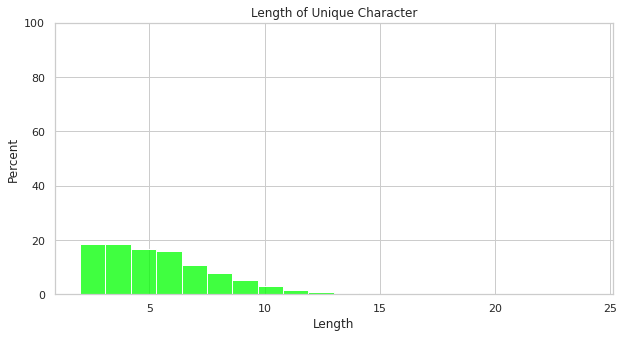

In [9]:
fig = plt.figure(figsize=(10, 5))
sns.set_theme(style='whitegrid')
sns.histplot(data=df["term_unique"], color="lime", stat="percent", bins=20, element="bars", cumulative=False).set(title="Length of Unique Character", xlabel="Length", ylabel="Percent")
plt.ylim(0, 100)
plt.show()

## Ratio of Unique Character

In [10]:
# unique char / term size
df["unique_ratio"] = df["term_unique"]/df["term_len"]

In [11]:
df[["model_name", "term_len", "term_unique", "unique_ratio"]].head(10)

,model_name,term_len,term_unique,unique_ratio
0,hef-600,7,6,0.857143
1,clt-k406s,9,9,1.000000
2,clp-367w,8,8,1.000000
3,s3055,5,4,0.800000
4,v10,3,3,1.000000
5,cs-2900,7,6,0.857143
6,3.5mm,5,4,0.800000
7,m-2538t,7,7,1.000000
8,fc-6141,7,6,0.857143
9,smh-3100ub,10,9,0.900000


In [12]:
df["unique_ratio"].min()

0.19230769230769232

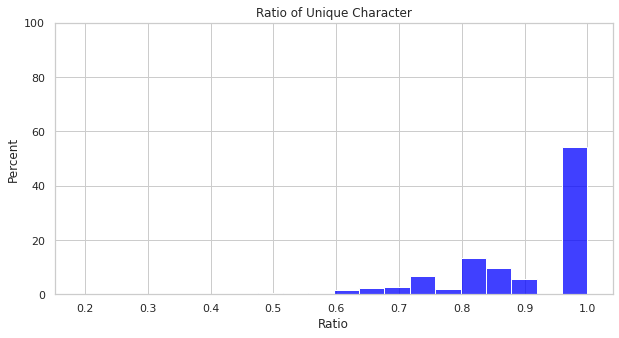

In [37]:
fig = plt.figure(figsize=(10, 5))
sns.set_theme(style='whitegrid')
sns.histplot(data=df["unique_ratio"], color="blue", stat="percent", bins=20, element="bars", cumulative=False).set(title="Ratio of Unique Character", xlabel="Ratio", ylabel="Percent")
plt.ylim(0, 100)
plt.show()

## Structure of Model Name

In [14]:
# 대상 term의 구조
# alpnum 0 / synum: 특수문자(.-_)랑 숫자 1 / syalp 2 / syalpnum 3

def is_synum(term):
    special_character = [".", "_", "-"]
    
    for char in term:
        if char in special_character:
            pass
        elif char.isdigit():
            pass
        else:
            return False
    return True


def is_syalp(term):
    special_character = [".", "_", "-"]
    
    for char in term:
        if char in special_character:
            pass
        elif char.isalpha():
            pass
        else:
            return False
    return True


def is_syalpnum(term):
    special_character = [".", "_", "-"]
    
    for char in term:
        if char in special_character:
            pass
        elif char.isalpha():
            pass
        elif char.isdigit():
            pass
        else:
            return False
    return True


def term_filter(term):
    if term.isalnum():
        return 0
    elif is_synum(term):
        return 1
    elif is_syalp(term):
        return 2
    elif is_syalpnum(term):
        return 3
    

In [15]:
df["structure"] = df["model_name"].apply(lambda x: term_filter(x))
df[["model_name", "structure"]].head(20)

,model_name,structure
0,hef-600,3
1,clt-k406s,3
2,clp-367w,3
3,s3055,0
4,v10,0
5,cs-2900,3
6,3.5mm,3
7,m-2538t,3
8,fc-6141,3
9,smh-3100ub,3


In [16]:
df["structure"].value_counts()

0    559220
3    408482
2     58093
1     58089
Name: structure, dtype: int64

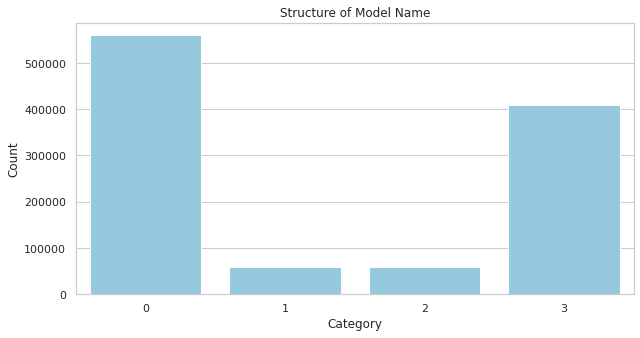

In [17]:
fig = plt.figure(figsize=(10, 5))
sns.set_theme(style='whitegrid')
df["structure"] = df["structure"].astype("category")
sns.countplot(data=df, x="structure", color="skyblue", ).set(title="Structure of Model Name", xlabel="Category", ylabel="Count")
# plt.ylim(0, 100)
plt.show()

In [54]:
df["structure"].value_counts()

0    559220
3    408482
2     58093
1     58089
Name: structure, dtype: int64

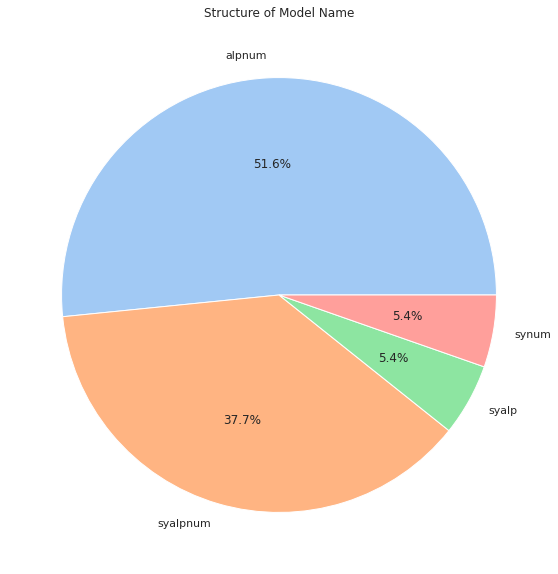

In [62]:
plt.figure(figsize=(10, 10))
colors = sns.color_palette('pastel')[0:5]
plt.pie(df["structure"].value_counts(), labels=["alpnum", "syalpnum", "syalp", "synum"], colors=colors, autopct='%1.1f%%', )

plt.title('Structure of Model Name')

plt.show()


In [18]:
structure = np.array(df["structure"])
structure = structure.reshape(-1, 1)
structure[:10]

array([[3],
       [3],
       [3],
       [0],
       [0],
       [3],
       [3],
       [3],
       [3],
       [3]])

In [19]:
encoder = OneHotEncoder()
encoded_structure = encoder.fit_transform(structure)
encoded_structure = encoded_structure.toarray()

In [20]:
encoded_structure[:10]

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [21]:
df[["struct_alpnum", "struct_synum", "struct_syalp", "struct_syalpnum"]] = encoded_structure
df.head()

,pid,product,dataset,brand,maker,model_name,label,term_len,term_unique,unique_ratio,structure,struct_alpnum,struct_synum,struct_syalp,struct_syalpnum
0,0,s 아람 한일 전기 미니온풍기 hef-600 히터 난방 난로,"(hef-600, True)",한일,한일,hef-600,True,7,6,0.857143,3,0.0,0.0,0.0,1.0
1,1,삼성 clt-k406s clp-367w 정품토너 s3055,"(clt-k406s, False)",,기타,clt-k406s,False,9,9,1.000000,3,0.0,0.0,0.0,1.0
2,1,삼성 clt-k406s clp-367w 정품토너 s3055,"(clp-367w, False)",,기타,clp-367w,False,8,8,1.000000,3,0.0,0.0,0.0,1.0
3,1,삼성 clt-k406s clp-367w 정품토너 s3055,"(s3055, False)",,기타,s3055,False,5,4,0.800000,0,1.0,0.0,0.0,0.0
4,2,솔리퍼블릭 tracks hd v10 3 버튼 헤드폰,"(v10, False)",,솔리퍼블릭,v10,False,3,3,1.000000,0,1.0,0.0,0.0,0.0


## First Character of Model Name

In [22]:
# 대상 term의 first char
# num 1 / alp 2

def first_char_filter(term):
    if term[0].isdigit():
        return 1
    elif term[0].isalpha():
        return 2
    else:
        return None
    
df["first_char"] = df["model_name"].apply(lambda x: first_char_filter(x))
df["first_char"].value_counts()

2.0    744169
1.0    320635
Name: first_char, dtype: int64

In [23]:
df[["model_name", "first_char"]].head(20)

,model_name,first_char
0,hef-600,2.0
1,clt-k406s,2.0
2,clp-367w,2.0
3,s3055,2.0
4,v10,2.0
5,cs-2900,2.0
6,3.5mm,1.0
7,m-2538t,2.0
8,fc-6141,2.0
9,smh-3100ub,2.0


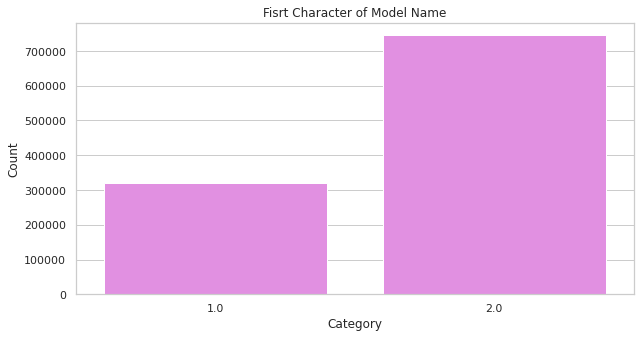

In [24]:
fig = plt.figure(figsize=(10, 5))
sns.set_theme(style='whitegrid')
df["first_char"] = df["first_char"].astype("category")
sns.countplot(data=df, x="first_char", color="violet", ).set(title="Fisrt Character of Model Name", xlabel="Category", ylabel="Count")

plt.show()

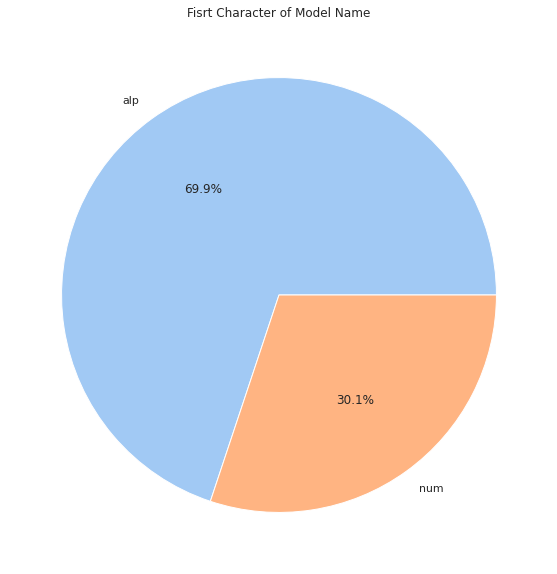

In [64]:
plt.figure(figsize=(10, 10))
colors = sns.color_palette('pastel')[0:5]
plt.pie(df["first_char"].value_counts(), labels=["alp", "num"], colors=colors, autopct='%1.1f%%', )

plt.title('Fisrt Character of Model Name')

plt.show()

In [25]:
first_char = np.array(df["first_char"])
first_char = first_char.reshape(-1, 1)

encoder = OneHotEncoder()
encoded_first_char = encoder.fit_transform(first_char)
encoded_first_char = encoded_first_char.toarray()

encoded_first_char = encoded_first_char[:, :-1]
encoded_first_char[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [26]:
df[["first_num", "first_alp"]] = encoded_first_char
df.head()

,pid,product,dataset,brand,maker,model_name,label,term_len,term_unique,unique_ratio,structure,struct_alpnum,struct_synum,struct_syalp,struct_syalpnum,first_char,first_num,first_alp
0,0,s 아람 한일 전기 미니온풍기 hef-600 히터 난방 난로,"(hef-600, True)",한일,한일,hef-600,True,7,6,0.857143,3,0.0,0.0,0.0,1.0,2.0,0.0,1.0
1,1,삼성 clt-k406s clp-367w 정품토너 s3055,"(clt-k406s, False)",,기타,clt-k406s,False,9,9,1.000000,3,0.0,0.0,0.0,1.0,2.0,0.0,1.0
2,1,삼성 clt-k406s clp-367w 정품토너 s3055,"(clp-367w, False)",,기타,clp-367w,False,8,8,1.000000,3,0.0,0.0,0.0,1.0,2.0,0.0,1.0
3,1,삼성 clt-k406s clp-367w 정품토너 s3055,"(s3055, False)",,기타,s3055,False,5,4,0.800000,0,1.0,0.0,0.0,0.0,2.0,0.0,1.0
4,2,솔리퍼블릭 tracks hd v10 3 버튼 헤드폰,"(v10, False)",,솔리퍼블릭,v10,False,3,3,1.000000,0,1.0,0.0,0.0,0.0,2.0,0.0,1.0


## End Character of Model Name

In [27]:
# end char 
# num 1 alp 2

def end_char_filter(term):
    if term[-1].isdigit():
        return 1
    elif term[-1].isalpha():
        return 2
    else:
        return None
    
df["end_char"] = df["model_name"].apply(lambda x: end_char_filter(x))
df["end_char"].value_counts()

2.0    591754
1.0    477553
Name: end_char, dtype: int64

In [28]:
df[["model_name", "end_char"]].head()

,model_name,end_char
0,hef-600,1.0
1,clt-k406s,2.0
2,clp-367w,2.0
3,s3055,1.0
4,v10,1.0


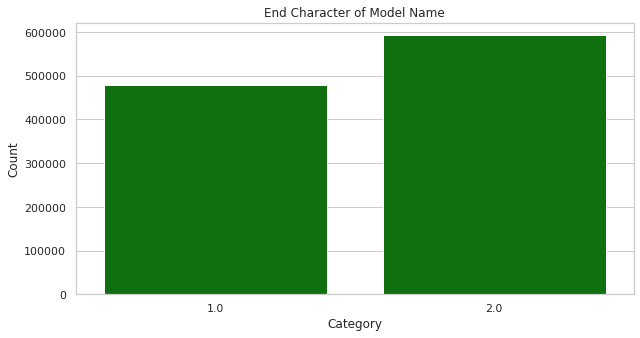

In [36]:
fig = plt.figure(figsize=(10, 5))
sns.set_theme(style='whitegrid')
df["end_char"] = df["end_char"].astype("category")
sns.countplot(data=df, x="end_char", color="green", ).set(title="End Character of Model Name", xlabel="Category", ylabel="Count")

plt.show()

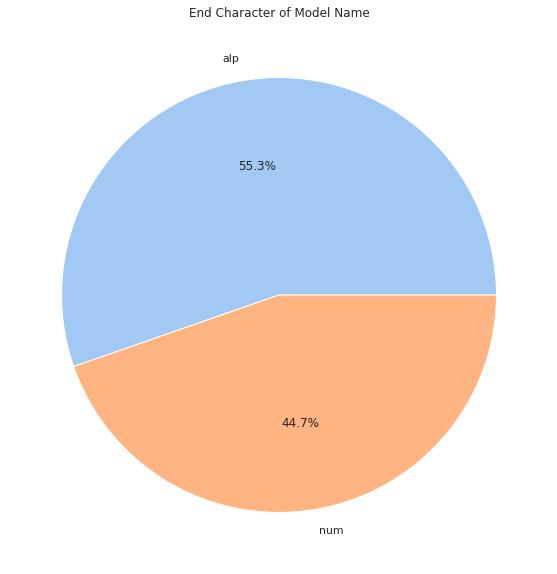

In [65]:
plt.figure(figsize=(10, 10))
colors = sns.color_palette('pastel')[0:5]
plt.pie(df["end_char"].value_counts(), labels=["alp", "num"], colors=colors, autopct='%1.1f%%', )

plt.title('End Character of Model Name')

plt.show()

In [30]:
end_char = np.array(df["end_char"])
end_char = end_char.reshape(-1, 1)

encoder = OneHotEncoder()
encoded_end_char = encoder.fit_transform(end_char)
encoded_end_char = encoded_end_char.toarray()

encoded_end_char = encoded_end_char[:, :-1]
encoded_end_char[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [31]:
df[["end_num", "end_alp"]] = encoded_end_char
df.head()

,pid,product,dataset,brand,maker,model_name,label,term_len,term_unique,unique_ratio,...,struct_alpnum,struct_synum,struct_syalp,struct_syalpnum,first_char,first_num,first_alp,end_char,end_num,end_alp
0,0,s 아람 한일 전기 미니온풍기 hef-600 히터 난방 난로,"(hef-600, True)",한일,한일,hef-600,True,7,6,0.857143,...,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0
1,1,삼성 clt-k406s clp-367w 정품토너 s3055,"(clt-k406s, False)",,기타,clt-k406s,False,9,9,1.000000,...,0.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0
2,1,삼성 clt-k406s clp-367w 정품토너 s3055,"(clp-367w, False)",,기타,clp-367w,False,8,8,1.000000,...,0.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0
3,1,삼성 clt-k406s clp-367w 정품토너 s3055,"(s3055, False)",,기타,s3055,False,5,4,0.800000,...,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0
4,2,솔리퍼블릭 tracks hd v10 3 버튼 헤드폰,"(v10, False)",,솔리퍼블릭,v10,False,3,3,1.000000,...,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0


In [40]:
# symbol 개수 

def count_symbols(term):
    count = 0
    special_character = [".", "_", "-"]
    for char in term:
        if char in special_character:
            count += 1
    
    return count

df["num_symbol"] = df["model_name"].apply(lambda x: count_symbols(x))
df[["model_name", "num_symbol"]].head()

,model_name,num_symbol
0,hef-600,1
1,clt-k406s,1
2,clp-367w,1
3,s3055,0
4,v10,0


In [48]:
df["num_symbol"].value_counts()

0     559220
1     489833
2      27694
3       6071
4        766
5        240
6         37
7         12
8          7
9          3
11         1
Name: num_symbol, dtype: int64

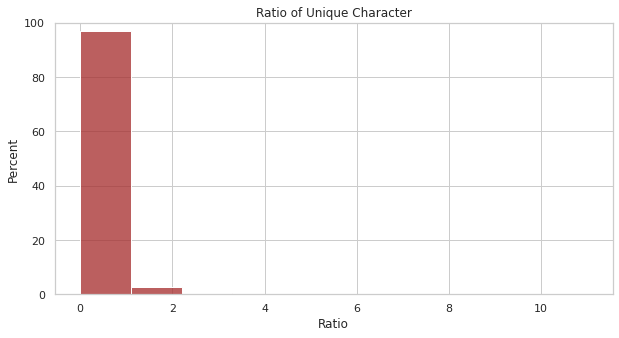

In [50]:
fig = plt.figure(figsize=(10, 5))
sns.set_theme(style='whitegrid')
sns.histplot(data=df["num_symbol"], color="brown", stat="percent", bins=10, element="bars", cumulative=False).set(title="Ratio of Unique Character", xlabel="Ratio", ylabel="Percent")
plt.ylim(0, 100)
plt.show()

In [68]:
# 숫자 비중

def ratio_digit(term):
    count = 0
    for char in term:
        if char.isdigit():
            count+=1
    
    return count

df["ratio_digit"] = df["model_name"].apply(lambda x: ratio_digit(x)/len(x))
df[["model_name", "ratio_digit"]].head()

,model_name,ratio_digit
0,hef-600,0.428571
1,clt-k406s,0.333333
2,clp-367w,0.375000
3,s3055,0.800000
4,v10,0.666667


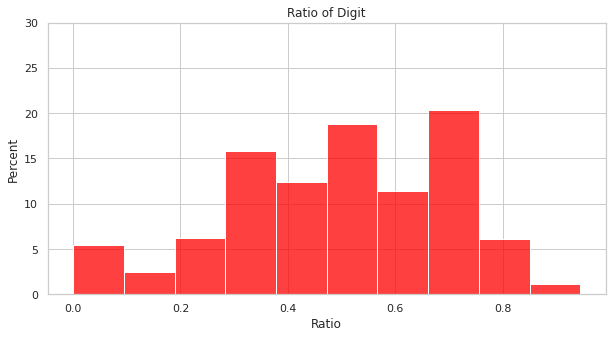

In [81]:
fig = plt.figure(figsize=(10, 5))
sns.set_theme(style='whitegrid')
sns.histplot(data=df["ratio_digit"], color="red", stat="percent", bins=10, element="bars", cumulative=False).set(title="Ratio of Digit", xlabel="Ratio", ylabel="Percent")
plt.ylim(0, 30)
plt.show()

In [75]:
# 영문자 비중

# 숫자 비중

def ratio_alpha(term):
    count = 0
    for char in term:
        if char.isalpha():
            count+=1
    
    return count

df["ratio_alpha"] = df["model_name"].apply(lambda x: ratio_alpah(x)/len(x))
df[["model_name", "ratio_alpha"]].head()

,model_name,ratio_alpha
0,hef-600,0.428571
1,clt-k406s,0.555556
2,clp-367w,0.500000
3,s3055,0.200000
4,v10,0.333333


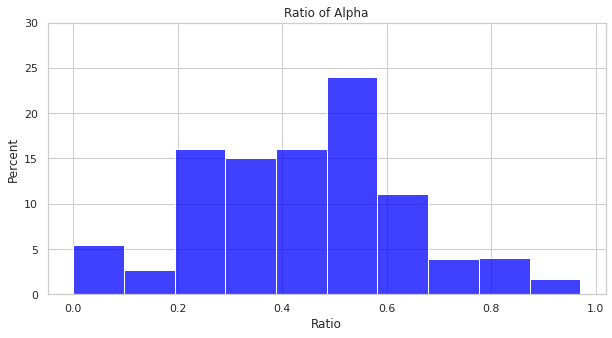

In [80]:
fig = plt.figure(figsize=(10, 5))
sns.set_theme(style='whitegrid')
sns.histplot(data=df["ratio_alpha"], color="blue", stat="percent", bins=10, element="bars", cumulative=False).set(title="Ratio of Alpha", xlabel="Ratio", ylabel="Percent")
plt.ylim(0, 30)
plt.show()

In [35]:
# 시간 남으면 model 하면 될 듯~